<b> Enric Galceran, Vladimir Djapic, Marc Carreras, David P Williams, </b><br>
<b> A Real-time Underwater Object Detection Algorithm for Multi-beam Forward Looking Sonar, </b><br>
IFAC Proceedings Volumes, <br>
Volume 45, Issue 5, <br>
2012, <br>
Pages 306-311, <br>
ISSN 1474-6670, <br>
ISBN 9783902823199, <br>
https://doi.org/10.3182/20120410-3-PT-4028.00051. <br>
(http://www.sciencedirect.com/science/article/pii/S1474667016306206) <br>
Abstract: A novel algorithm for the detection of underwater man-made objects in forward-looking sonar imagery is proposed. The algorithm takes advantage of the integral-image representation to quickly compute features, and progressively reduces the computational load by working on smaller portions of the image along the detection process phases. By adhering to the proposed scheme, real-time detection on sonar data onboard an autonomous vehicle is made possible. The proposed method does not require training data, as it dynamically takes into account environmental characteristics of the sensed sonar data. The proposed approach has been implemented and integrated into the software system of the Gemellina autonomous surface vehicle, and is able to run in real time. The validity of the proposed approach is demonstrated on real experiments carried out at sea with the Gemellina autonomous surface vehicle.
Keywords: Detection algorithms; forward-looking sonar; underwater object detection; acoustic image processing; image processing


In [1]:
import os
import cv2 ## openCV
import matplotlib.pyplot as plt
import numpy as np

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

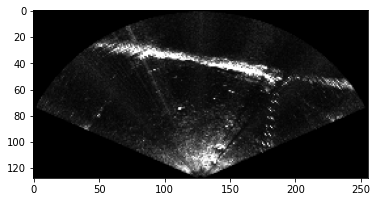

In [2]:
file = "ARACATI2017 - Translation\\train\\input\\train_00000.png"

img = cv2.imread(file)
plt.imshow(img)

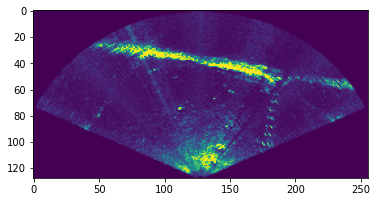

In [3]:
## GRAYSCALE converted image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### 1. Region of Interest

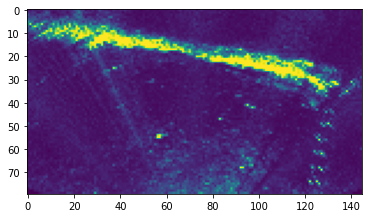

In [4]:
region_of_interest = gray[20:100, 55:200]
plt.imshow(region_of_interest)

### 2. Integral Image

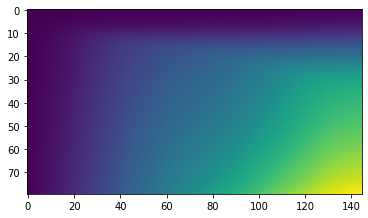

In [5]:
intergral_image = cv2.integral(region_of_interest)
## removing padded row, column with 0 value that is generated by the integral image function
intergral_image = intergral_image[1:intergral_image.shape[0], 1:intergral_image.shape[1]]
plt.imshow(intergral_image)

### 3. Background Estimation Integral

In [6]:
## Background estimation parameters - inner and outer window sizes
b_ox = b_oy = 8
b_ix = b_iy = 2

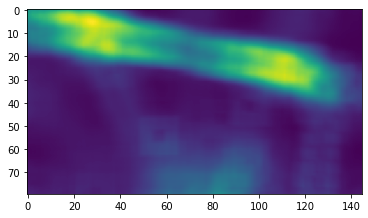

In [7]:
background_estimation = np.empty(intergral_image.shape)

for y in range(background_estimation.shape[0]):
    for x in range(background_estimation.shape[1]):
        ix_min = max(x - b_ix, 0)
        iy_min = max(y - b_iy, 0)
        
        ix_max = min(x + b_ix, background_estimation.shape[1]-1)
        iy_max = min(y + b_iy, background_estimation.shape[0]-1)
        
        ox_min = max(x - b_ox, 0)
        oy_min = max(y - b_oy, 0)

        ox_max = min(x + b_ox, background_estimation.shape[1]-1)
        oy_max = min(y + b_oy, background_estimation.shape[0]-1)
        
        no = (oy_max - oy_min +1) * (ox_max - ox_min +1)
        ni = (iy_max - iy_min +1) * (ix_max - ix_min +1)
        
        sum_outer = intergral_image[oy_max][ox_max]
        if ox_min-1 >= 0:
            sum_outer = sum_outer - intergral_image[oy_max][ox_min-1]
        if oy_min-1 >= 0:
            sum_outer = sum_outer - intergral_image[oy_min-1][ox_max]
        if (ox_min-1 >= 0) & (oy_min-1 >= 0):
            sum_outer = sum_outer + intergral_image[oy_min-1][ox_min-1]
        
        sum_inner = intergral_image[iy_max][ix_max]
        if ix_min-1 >= 0:
            sum_inner = sum_inner - intergral_image[iy_max][ix_min-1]
        if iy_min-1 >= 0:
            sum_inner = sum_inner - intergral_image[iy_min-1][ix_max]
        if (ix_min-1 >= 0) & (iy_min-1 >= 0):
            sum_inner = sum_inner + intergral_image[iy_min-1][ix_min-1]
        
        background_estimation[y][x] = (sum_outer - sum_inner)/(no - ni)
        
plt.imshow(background_estimation)

#### Checking background result using direct calculation

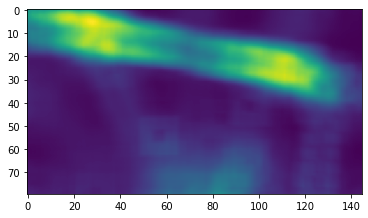

In [8]:
background_estimation_direct = np.empty(intergral_image.shape)

for y in range(background_estimation_direct.shape[0]):
    for x in range(background_estimation_direct.shape[1]):
        ix_min = max(x - b_ix, 0)
        iy_min = max(y - b_iy, 0)
        
        ix_max = min(x + b_ix, background_estimation_direct.shape[1]-1)
        iy_max = min(y + b_iy, background_estimation_direct.shape[0]-1)
        
        ox_min = max(x - b_ox, 0)
        oy_min = max(y - b_oy, 0)

        ox_max = min(x + b_ox, background_estimation_direct.shape[1]-1)
        oy_max = min(y + b_oy, background_estimation_direct.shape[0]-1)
        
        no = (oy_max - oy_min +1) * (ox_max - ox_min +1)
        ni = (iy_max - iy_min +1) * (ix_max - ix_min +1)
        
        sum_outer = np.sum(region_of_interest[oy_min:oy_max+1, ox_min:ox_max+1])
        
        sum_inner = np.sum(region_of_interest[iy_min:iy_max+1, ix_min:ix_max+1])
        
        background_estimation_direct[y][x] = (sum_outer - sum_inner)/(no - ni)
        
plt.imshow(background_estimation_direct)

#### Comparing the two background results to check that the integral image output and direct calculation output is similar

In [9]:
difference = cv2.subtract(background_estimation_direct, background_estimation)
if cv2.countNonZero(difference) == 0:
    print("The images are completely Equal")

The images are completely Equal


### 4. Echo Estimation

In [10]:
## Echo estimation parameter - window size
ex = ey = 3

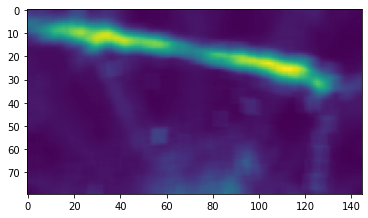

In [11]:
echo_estimation = np.empty(intergral_image.shape)

for y in range(echo_estimation.shape[0]):
    for x in range(echo_estimation.shape[1]):
        x_min = max(x - ex, 0)
        y_min = max(y - ey, 0)
        
        x_max = min(x + ex, background_estimation.shape[1]-1)
        y_max = min(y + ey, background_estimation.shape[0]-1)
        
        ne = (y_max - y_min +1) * (x_max - x_min +1)
        
        sum_box = intergral_image[y_max][x_max]
        if x_min-1 >= 0:
            sum_box = sum_box - intergral_image[y_max][x_min-1]
        if y_min-1 >= 0:
            sum_box = sum_box - intergral_image[y_min-1][x_max]
        if (x_min-1 >= 0) & (y_min-1 >= 0):
            sum_box = sum_box + intergral_image[y_min-1][x_min-1]
        
        echo_estimation[y][x] = sum_box / ne

plt.imshow(echo_estimation)

#### Checking echo result using direct calculation

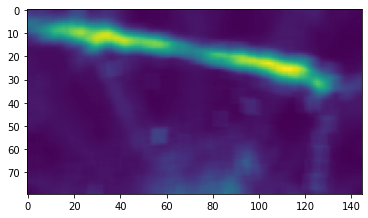

In [12]:
echo_estimation_direct = np.empty(intergral_image.shape)

for y in range(echo_estimation_direct.shape[0]):
    for x in range(echo_estimation_direct.shape[1]):
        x_min = max(x - ex, 0)
        y_min = max(y - ey, 0)
        
        x_max = min(x + ex, background_estimation.shape[1]-1)
        y_max = min(y + ey, background_estimation.shape[0]-1)
        
        ne = (y_max - y_min +1) * (x_max - x_min +1)
        
        sum_box = np.sum(region_of_interest[y_min:y_max+1, x_min:x_max+1])
        
        echo_estimation_direct[y][x] = sum_box / ne

plt.imshow(echo_estimation_direct)

#### Comparing the two background results to check that the integral image output and direct calculation output is similar

In [13]:
difference = cv2.subtract(echo_estimation_direct, echo_estimation)
if cv2.countNonZero(difference) == 0:
    print("The images are completely Equal")

The images are completely Equal


### 5. Potential Alarms Determination

In [14]:
beta = 1.5

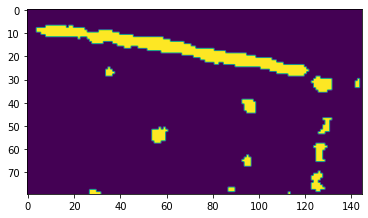

In [15]:
potential_alarms = np.empty(intergral_image.shape, dtype=np.int)

for y in range(intergral_image.shape[0]):
    for x in range(intergral_image.shape[1]):
        if(echo_estimation[y][x] > (beta)*background_estimation[y][x]):
            potential_alarms[y][x] = int(255)
        else:
            potential_alarms[y][x] = int(0)

plt.imshow(potential_alarms)

#### Blob detection - can also be done simultaneously in the next step as shown

Keypoints generated: 12


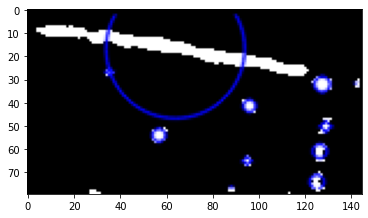

In [16]:
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 1
params.maxThreshold = 200

params.filterByColor = False
#params.blobColor = 1

params.filterByArea = True
params.minArea = 1

params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False

detector = cv2.SimpleBlobDetector_create(params)

potential_alarms_u8 = np.uint8(potential_alarms)
#im = cv2.bitwise_not(potential_alarms_u8)

keypoints = detector.detect(potential_alarms_u8)
print("Keypoints generated:", len(keypoints))

im_with_keypoints = cv2.drawKeypoints(potential_alarms_u8, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

### 6. Geometrical and Morphological Filtering

#### Filtering by Keypoint size

Initial keypoints: 12
Filtered keypoints: 6


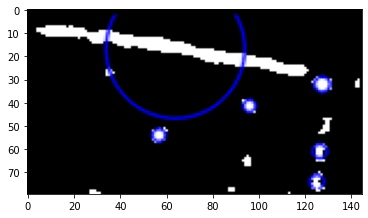

In [17]:
## since we do not have length and breadth information in this case, we can use diameter to determine
lower_bound_size = 5
filtered_keypoints = [keypoints[i] for i in range(len(keypoints)) if [keypoint.size > lower_bound_size for keypoint in keypoints][i]]

print("Initial keypoints:", len(keypoints))
print("Filtered keypoints:", len(filtered_keypoints))

im_with_keypoints = cv2.drawKeypoints(potential_alarms_u8, filtered_keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

#### Filtering by Contour Size

Initial Contours: 13
Filtered Contours: 7


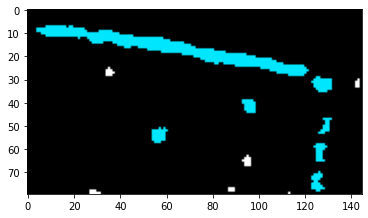

In [18]:
potential_alarms_u8 = np.uint8(potential_alarms)
thresh = potential_alarms_u8
contours_list = []

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
thresh = np.expand_dims(thresh, axis=2).repeat(3, axis=2)

threshold_area = 10
for c in contours:
    area = cv2.contourArea(c)
    if area > threshold_area:
        contours_list.append(c)

print("Initial Contours:", len(contours))
print("Filtered Contours:", len(contours_list))

for k, _ in enumerate(contours_list):
    thresh = cv2.drawContours(thresh, contours_list, k, (0, 230, 255), -1)
plt.imshow(thresh)

### 7. Echo Scoring and Thresholding - using contours

Initial Contours: 7
Filtered Contours: 4


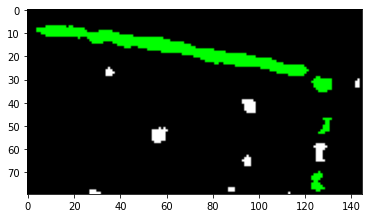

In [19]:
echo_scores_contours = []

for contour in contours_list:
    sum_intensity = 0
    no_of_points = 0
    for point in contour:
        x = point[0][0]
        y = point[0][1]
        sum_intensity = sum_intensity + region_of_interest[y][x]
        no_of_points = no_of_points + 1
    echo_scores_contours.append(sum_intensity/no_of_points)

echo_scores_contours_threshold = 40
index_filter = [echo_score > echo_scores_contours_threshold for echo_score in echo_scores_contours]

filtered_contours_list = [i for indx,i in enumerate(contours_list) if index_filter[indx] == True]

print("Initial Contours:", len(contours_list))
print("Filtered Contours:", len(filtered_contours_list))

potential_alarms_u8 = np.uint8(potential_alarms)
thresh2 = np.expand_dims(potential_alarms_u8, axis=2).repeat(3, axis=2)

for k, _ in enumerate(filtered_contours_list):
    thresh2 = cv2.drawContours(thresh2, filtered_contours_list, k, (0, 255, 0), -1)
plt.imshow(thresh2)